# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [6]:
from google.colab import files
uploaded = files.upload()


Saving CT_AVM.nii.gz to CT_AVM.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [8]:

file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

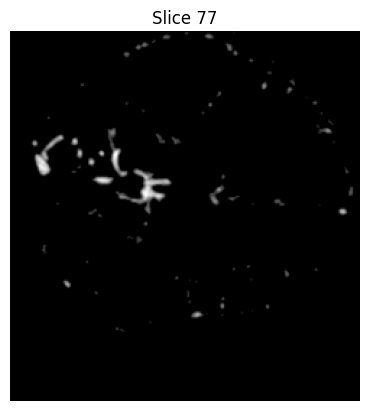

In [9]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [10]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

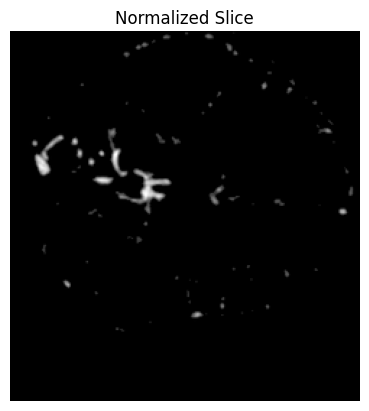

In [11]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

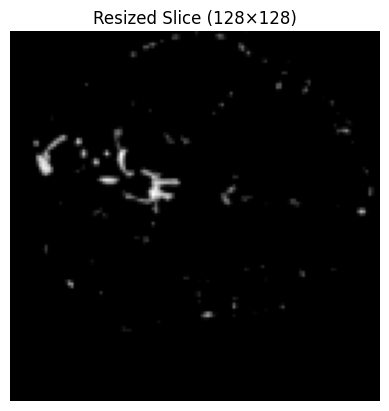

In [12]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [13]:
dataset_path = "/kaggle/input/mri-dataset-for-detection-and-analysis/3D_volumetric_imaging/"


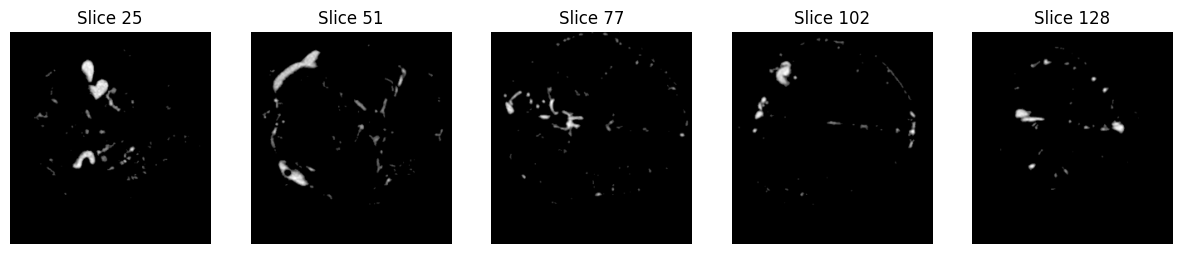

In [15]:

depth = mri.shape[2]
slice_indices = [
    depth // 6,
    depth // 3,
    depth // 2,
    (2 * depth) // 3,
    (5 * depth) // 6
]

plt.figure(figsize=(15, 3))

for i, idx in enumerate(slice_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mri[:, :, idx], cmap="gray")
    plt.title(f"Slice {idx}")
    plt.axis("off")

plt.show()



In [16]:
def plot_slices(volume, indices):
    plt.figure(figsize=(3 * len(indices), 3))

    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap="gray")
        plt.title(f"Slice {idx}")
        plt.axis("off")

    plt.show()


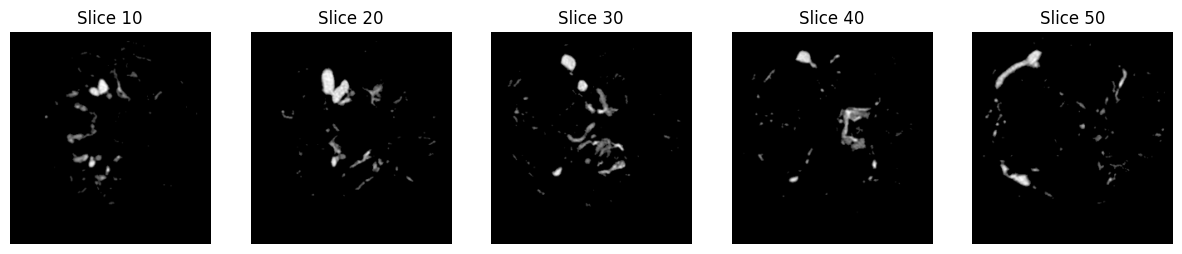

In [17]:
plot_slices(mri, [10, 20, 30, 40, 50])


In [18]:
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)

    normalized = (volume - min_val) / (max_val - min_val)
    return normalized


In [19]:
mri_normalized = normalize_volume(mri)

print("Min:", mri_normalized.min())
print("Max:", mri_normalized.max())


Min: 0.0
Max: 1.0


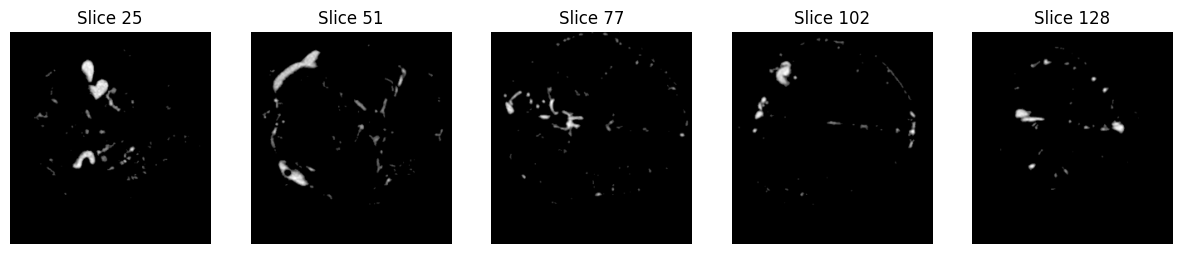

In [20]:
plot_slices(mri_normalized, slice_indices)
